-  Collection rain mass by ice QRCOL: line plot with time, calculate the tot QRcol of D03

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,CoordPair, GeoBounds,
                 cartopy_ylim, latlon_coords,ll_to_xy)

In [17]:
ncfile = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_cont/wrfout_d03_2006-01-18_12:00:00")
ncfile_t = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_turb/wrfout_d03_2006-01-18_12:00:00")
ncfile_19 = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_cont/wrfout_d03_2006-01-18_12:00:00")
ncfile_19_t = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_turb/wrfout_d03_2006-01-18_12:00:00")

In [18]:
col_tot=np.empty(24)
col_tot_t=np.empty(24)
for i in range(0, 12):  
    qrcol = getvar(ncfile, "QRCOL", timeidx=i)
    qrcol_t = getvar(ncfile_t, "QRCOL", timeidx=i)
    col_tot_t[i] = np.sum(qrcol_t)
    col_tot[i] = np.sum(qrcol)
for i in range(0, 12):
    qrcol = getvar(ncfile_19, "QRCOL", timeidx=i)
    qrcol_t = getvar(ncfile_19_t, "QRCOL", timeidx=i)
    col_tot_t[i+12] = np.sum(qrcol_t)
    col_tot[i+12] = np.sum(qrcol)
times = np.arange(0, 24)
times[0:12] = np.arange(1812, 1824)
times[12:24] = np.arange(1900, 1912)

[0.00000000e+00 2.08516955e-08 2.44408557e-06 8.94669120e-06
 1.03987031e-06 1.49299211e-07 7.35073780e-10 1.30771269e-07
 2.83598371e-08 1.65946460e-06 1.83511911e-05 5.29800582e-06
 0.00000000e+00 2.08516955e-08 2.44408557e-06 8.94669120e-06
 1.03987031e-06 1.49299211e-07 7.35073780e-10 1.30771269e-07
 2.83598371e-08 1.65946460e-06 1.83511911e-05 5.29800582e-06]
[1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1900 1901
 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911]


Text(0, 0.5, 'Collection rain mass by ice (QRCOL)')

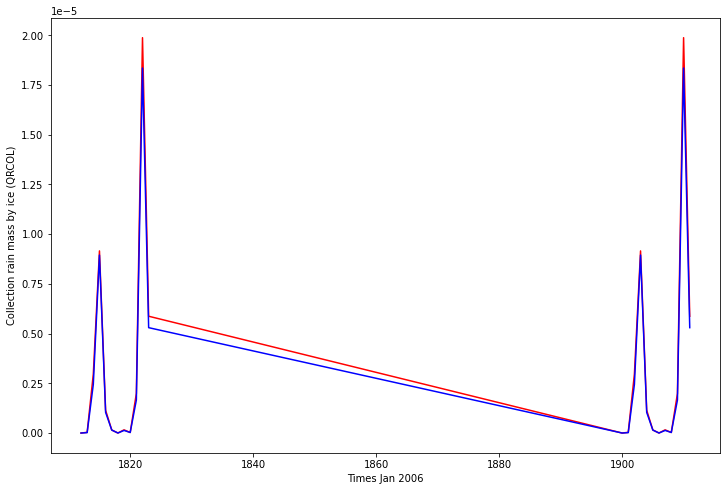

In [20]:
fig = plt.figure(figsize=(8s, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(times, col_tot_t, 'r-')
ax.plot(times, col_tot, 'b-')
ax.set_xlabel('Times Jan 2006')
ax.set_ylabel('Collection rain mass by ice (QRCOL)')
#ax.set_ylim(0, 20)
#plt.savefig('qrcol_time.png')